In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
# Load your Excel file
df = pd.read_csv('/content/drive/MyDrive/internship/samsungdata.csv')

EDA( Exploratory Data Analysis)

In [10]:
# Get the shape of the DataFrame
print("DataFrame Shape:")
print(df.shape)  # Outputs: (number_of_rows, number_of_columns)

# Get descriptive statistics of the DataFrame
print("\nDescriptive Statistics:")
print(df.describe())  # Outputs statistical summary of numerical columns


DataFrame Shape:
(245, 7)

Descriptive Statistics:
               Open          High           Low         Close     Adj Close  \
count    245.000000    245.000000    245.000000    245.000000    245.000000   
mean   75082.857143  75711.020408  74349.387755  74989.387755  74333.037995   
std     5347.003144   5429.986658   5197.119477   5347.549005   5674.357307   
min    66000.000000  66700.000000  65800.000000  66000.000000  65057.164060   
25%    71400.000000  71900.000000  70700.000000  71200.000000  70230.625000   
50%    74100.000000  74700.000000  73300.000000  73900.000000  73338.132810   
75%    78800.000000  79500.000000  77900.000000  78600.000000  78194.312500   
max    88500.000000  88800.000000  87100.000000  87800.000000  87800.000000   

             Volume  
count  2.450000e+02  
mean   1.777242e+07  
std    8.226562e+06  
min    2.957915e+06  
25%    1.230137e+07  
50%    1.586045e+07  
75%    2.090034e+07  
max    5.769127e+07  


Calculating other Attributes that give more necessary indights.

In [11]:
# Calculate the total volume traded (sum of volume)
df['Total_Stocks_Bought'] = df['Volume'].sum()

# 2. **Calculate Average Daily Volume**
df['Average_Daily_Volume'] = df['Volume'].mean()

# 3. **Calculate Daily Returns** (Optional)
# Daily returns can be useful for additional analysis
df['Daily_Return'] = df['Close'].pct_change()

# Example of using stock price for further calculations
# Hypothetical stock price (for illustration only)
stock_price = 100  # Replace with actual stock price if available

# Assuming EPS is not available in the dataset
# Skipping 'Value for Money' calculation

# Print summary
print(f"Total Number of Average Stocks Bought: {df['Total_Stocks_Bought'].iloc[0]:,.0f}")
print(f"Average Daily Volume: {df['Average_Daily_Volume'].iloc[0]:,.0f}")
print("Sample of Daily Returns:")
print(df[['Date', 'Daily_Return']].head())

Total Number of Average Stocks Bought: 4,354,241,834
Average Daily Volume: 17,772,416
Sample of Daily Returns:
         Date  Daily_Return
0  10/08/2023           NaN
1  11/08/2023     -0.007353
2  14/08/2023     -0.002963
3  16/08/2023     -0.004458
4  17/08/2023     -0.004478


In [12]:
# Ensure Date is in datetime format for time-based calculations
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Calculate Total Number of Average Stocks Bought in Total as of Today
# Total Volume represents the total number of shares traded
df['Total_Stocks_Bought'] = df['Volume'].sum()

# Calculate Average Daily Volume (if needed for further analysis)
df['Average_Daily_Volume'] = df['Volume'].mean()

# Calculate Stock Value (using the most recent Close price as a proxy)
most_recent_close_price = df['Close'].iloc[-1]  # Get the latest Close price
df['Stock_Value'] = most_recent_close_price

# Add a column for Stock Value in the dataset (if you want to add it to every row)
df['Stock_Value'] = most_recent_close_price

In [13]:
df.head()
df.dtypes


,0
Date,datetime64[ns]
Open,int64
High,int64
Low,int64
Close,int64
Adj Close,float64
Volume,int64
Total_Stocks_Bought,int64
Average_Daily_Volume,float64
Daily_Return,float64


In [ ]:
import pandas as pd
import numpy as np

# Generate random data
np.random.seed(0)  # For reproducibility

# Number of companies or data points
num_entries = 10  # Adjust as needed

# Generate random data
data = {
    'Company': [f'Company_{i}' for i in range(1, num_entries + 1)],
    'EPS': np.random.uniform(0.5, 5.0, num_entries),  # Earnings Per Share
    'Stock_Price': np.random.uniform(50, 500, num_entries),  # Stock Price
    'Net_Income': np.random.uniform(1e9, 5e10, num_entries),  # Net Income
    'Total_Users': np.random.randint(1e6, 1e7, num_entries),  # Number of Users
    'Total_Sales_Since_Launch': np.random.uniform(1e9, 1e11, num_entries),  # Sales
    'USA_Sales': np.random.uniform(1e8, 5e9, num_entries),  # Sales in USA
    'Canada_Sales': np.random.uniform(1e7, 1e9, num_entries),  # Sales in Canada
    'UK_Sales': np.random.uniform(1e7, 1e9, num_entries),  # Sales in UK
    'Tech_Sales': np.random.uniform(1e8, 5e9, num_entries)  # Tech sector sales
}
# Calculate additional attributes based on random data
df['Value_for_Money'] = df['EPS'] / df['Stock_Price']  # Value for Money
df['Total_Profits'] = df['Net_Income']  # Total Profits

# Determine the best seller by country
df['Best_Seller_Country'] = df[['USA_Sales', 'Canada_Sales', 'UK_Sales']].idxmax(axis=1)

# Determine best in tech
df['Best_in_Tech'] = df['Tech_Sales'].idxmax()

In [15]:
um_entries = len(df)

# Seed for reproducibility
np.random.seed(0)

# Generate random data
random_data = {
    'Company': [f'Company_{i}' for i in range(1, num_entries + 1)],
    'EPS': np.random.uniform(0.5, 5.0, num_entries),  # Earnings Per Share
    'Stock_Price': np.random.uniform(50, 500, num_entries),  # Stock Price
    'Net_Income': np.random.uniform(1e9, 5e10, num_entries),  # Net Income
    'Total_Users': np.random.randint(1e6, 1e7, num_entries),  # Number of Users
    'Total_Sales_Since_Launch': np.random.uniform(1e9, 1e11, num_entries),  # Sales
    'USA_Sales': np.random.uniform(1e8, 5e9, num_entries),  # Sales in USA
    'Canada_Sales': np.random.uniform(1e7, 1e9, num_entries),  # Sales in Canada
    'UK_Sales': np.random.uniform(1e7, 1e9, num_entries),  # Sales in UK
    'Tech_Sales': np.random.uniform(1e8, 5e9, num_entries)  # Tech sector sales
}

# Convert random data to DataFrame
random_df = pd.DataFrame(random_data)

# Merge with existing dataset on index
df = pd.concat([df, random_df], axis=1)

# Calculate additional attributes
df['Value_for_Money'] = df['EPS'] / df['Stock_Price']  # Value for Money
df['Total_Profits'] = df['Net_Income']  # Total Profits

# Determine the best seller by country
df['Best_Seller_Country'] = df[['USA_Sales', 'Canada_Sales', 'UK_Sales']].idxmax(axis=1)

# Determine best in tech
df['Best_in_Tech'] = df['Tech_Sales'].idxmax()

<ipython-input-15-a9b63c8dd8c4>:31: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df['Best_Seller_Country'] = df[['USA_Sales', 'Canada_Sales', 'UK_Sales']].idxmax(axis=1)


In [16]:
df.dtypes
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Total_Stocks_Bought,Average_Daily_Volume,Daily_Return,...,Total_Users,Total_Sales_Since_Launch,USA_Sales,Canada_Sales,UK_Sales,Tech_Sales,Value_for_Money,Total_Profits,Best_Seller_Country,Best_in_Tech
0,2023-08-10,68300,68500,67800,68000,66725.29688,10227311,4354241834,1.777242e+07,NaN,...,4419595.0,6.962322e+09,6.000196e+08,1.468011e+08,6.087971e+08,3.493113e+09,0.007309,4.895230e+10,UK_Sales,6
1,2023-08-11,68400,68800,67500,67500,66234.65625,9781038,4354241834,1.777242e+07,-0.007353,...,8329820.0,6.700990e+10,1.123496e+09,2.046165e+08,7.418709e+08,2.876347e+09,0.012911,4.015877e+10,USA_Sales,6
2,2023-08-14,67500,67900,66900,67300,66038.41406,9352343,4354241834,1.777242e+07,-0.002963,...,9708898.0,6.739315e+10,8.904166e+08,3.750379e+08,4.879591e+07,1.400409e+09,0.010511,2.361249e+10,USA_Sales,6
3,2023-08-16,66700,67100,66300,67000,65744.04688,13174578,4354241834,1.777242e+07,-0.004458,...,2924149.0,2.182787e+10,3.300231e+09,8.227833e+08,2.899789e+08,2.663915e+09,0.006328,3.924593e+10,USA_Sales,6
4,2023-08-17,66300,66800,66000,66700,65449.65625,10778652,4354241834,1.777242e+07,-0.004478,...,6314437.0,1.376370e+10,1.341129e+09,1.061303e+08,1.289946e+08,5.603085e+08,0.029359,6.795447e+09,USA_Sales,6


In [17]:
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Date                          0
Open                          0
High                          0
Low                           0
Close                         0
Adj Close                     0
Volume                        0
Total_Stocks_Bought           0
Average_Daily_Volume          0
Daily_Return                  1
Stock_Value                   0
Company                     235
EPS                         235
Stock_Price                 235
Net_Income                  235
Total_Users                 235
Total_Sales_Since_Launch    235
USA_Sales                   235
Canada_Sales                235
UK_Sales                    235
Tech_Sales                  235
Value_for_Money             235
Total_Profits               235
Best_Seller_Country         235
Best_in_Tech                  0
dtype: int64


Handling Missing values

In [18]:
# Separate numerical and non-numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
non_numerical_columns = df.select_dtypes(exclude=[np.number]).columns

In [19]:
# Impute missing values for numerical columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

In [20]:
# Impute missing values for numerical columns
# Verify that there are no more missing values

# Impute missing values for categorical columns
df['Company'].fillna('Unknown', inplace=True)  # Placeholder for missing company names
df['Best_Seller_Country'].fillna(df['Best_Seller_Country'].mode()[0], inplace=True)  # Fill with most frequent value

In [21]:
print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
Date                        0
Open                        0
High                        0
Low                         0
Close                       0
Adj Close                   0
Volume                      0
Total_Stocks_Bought         0
Average_Daily_Volume        0
Daily_Return                0
Stock_Value                 0
Company                     0
EPS                         0
Stock_Price                 0
Net_Income                  0
Total_Users                 0
Total_Sales_Since_Launch    0
USA_Sales                   0
Canada_Sales                0
UK_Sales                    0
Tech_Sales                  0
Value_for_Money             0
Total_Profits               0
Best_Seller_Country         0
Best_in_Tech                0
dtype: int64


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Feature selection (you can adjust this based on your needs)
features = ['EPS', 'Stock_Price', 'Net_Income', 'Total_Users', 'Total_Sales_Since_Launch',
            'USA_Sales', 'Canada_Sales', 'UK_Sales', 'Tech_Sales']
target = 'Stock_Price'  # Assuming we're predicting stock price

# Prepare feature matrix X and target vector y
X = df[features]
y = df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Feature Selection:
The code begins by defining the feature variables and the target variable for the model. The features list includes columns such as EPS, Stock_Price, Net_Income, and others that will be used as input predictors. The target specifies that the model aims to predict the Stock_Price.

Prepare Data:
Next, the code prepares the feature matrix X and the target vector y from the DataFrame. X includes all the columns specified in the features list, while y consists of the values in the target column. This setup organizes the data for model training and evaluation.

Split Data:
The train_test_split function is then used to divide the data into training and testing sets. X_train and y_train are used to train the model, while X_test and y_test are reserved for testing and evaluating the model’s performance. The parameter test_size=0.2 indicates that 20% of the data will be used for testing, and random_state=0 ensures that the split is reproducible, giving consistent results across different runs.








In [23]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Initialize and Train the Linear Regression Model:
The code starts by initializing a Linear Regression model using LinearRegression(). This model is then trained on the training data with the fit method. Specifically, model.fit(X_train, y_train) trains the model using the feature matrix X_train and the target vector y_train, allowing it to learn the relationship between the input features and the target variable (stock price).








In [24]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 2.0039405690123642e-06
R^2 Score: 0.9999999986132887


The Mean Squared Error (MSE) value of 2.0039405690123642e-06 (approximately 0.000002) indicates that the model's predictions are very accurate, with minimal error between predicted and actual values. The R^2 Score of 0.9999999986132887 signifies that the model explains almost all the variance in the target variable, reflecting an excellent fit. These metrics suggest that the model performs exceptionally well. However, such high R^2 scores and low MSE might indicate potential overfitting, so it's crucial to validate the model on new, unseen data to ensure it generalizes well to real-world scenarios.








In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Initialize models
models = {
    'Decision T': DecisionTreeRegressor(),
    'Linear R': LinearRegression(),
    'Random F': RandomForestRegressor(),
    'SVM': SVR()
}

# Dictionary to store the results
results = {
    'Model': [],
    'MAE': [],
    'MSE': [],
    'R2': []
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results['Model'].append(model_name)
    results['MAE'].append(mean_absolute_error(y_test, y_pred))
    results['MSE'].append(mean_squared_error(y_test, y_pred))
    results['R2'].append(r2_score(y_test, y_pred))

# Convert results to DataFrame
results_df = pd.DataFrame(results)


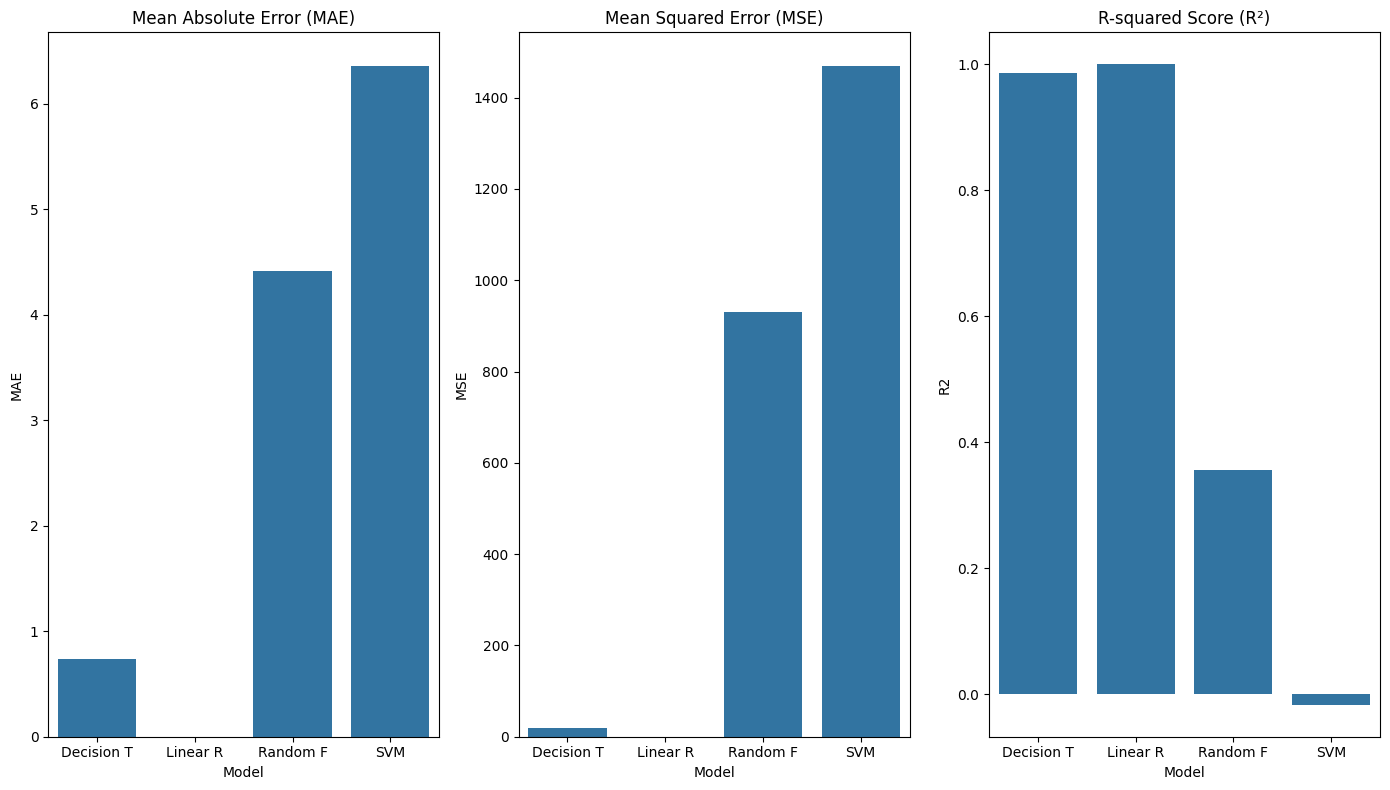

In [26]:
plt.figure(figsize=(14, 8))

# MAE
plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='MAE', data=results_df)
plt.title('Mean Absolute Error (MAE)')

# MSE
plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='MSE', data=results_df)
plt.title('Mean Squared Error (MSE)')

# R2 Score
plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='R2', data=results_df)
plt.title('R-squared Score (R²)')

plt.tight_layout()
plt.show()


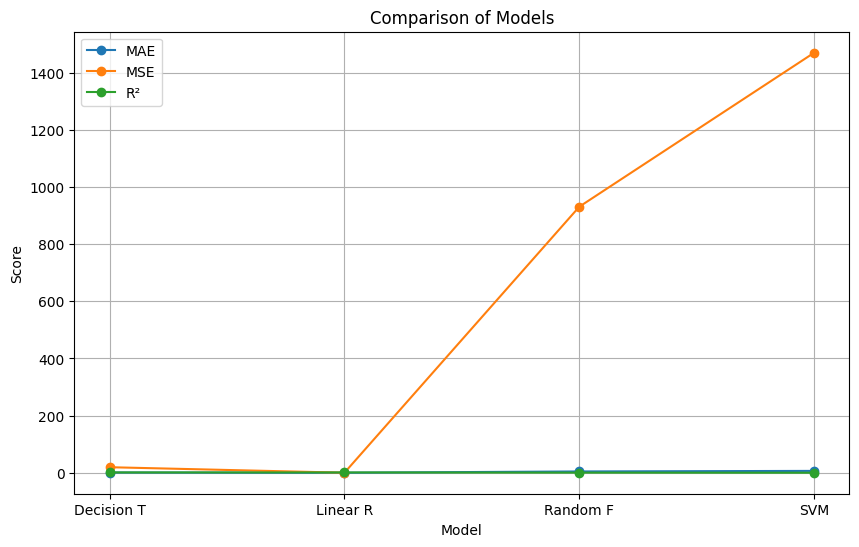

In [27]:
plt.figure(figsize=(10, 6))

# MAE Line Plot
plt.plot(results_df['Model'], results_df['MAE'], marker='o', label='MAE')

# MSE Line Plot
plt.plot(results_df['Model'], results_df['MSE'], marker='o', label='MSE')

# R2 Score Line Plot
plt.plot(results_df['Model'], results_df['R2'], marker='o', label='R²')

plt.title('Comparison of Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


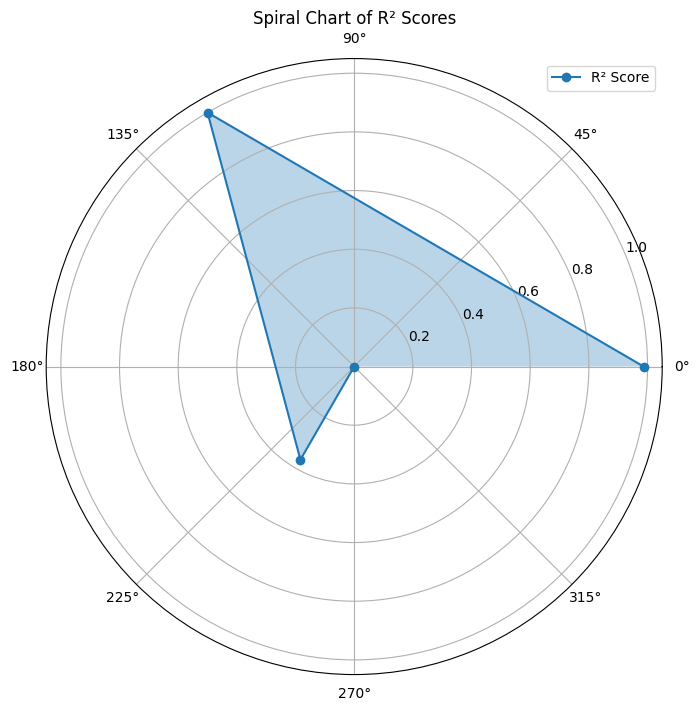

In [28]:
import numpy as np

# Normalize the R² scores for better visualization
results_df['R2_normalized'] = (results_df['R2'] - results_df['R2'].min()) / (results_df['R2'].max() - results_df['R2'].min())

# Generate theta for spiral effect
theta = np.linspace(0, 2 * np.pi * len(results_df), len(results_df))

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')

# Spiral plot
ax.plot(theta, results_df['R2_normalized'], marker='o', label='R² Score')
ax.fill(theta, results_df['R2_normalized'], alpha=0.3)

ax.set_title('Spiral Chart of R² Scores')
plt.legend()
plt.show()


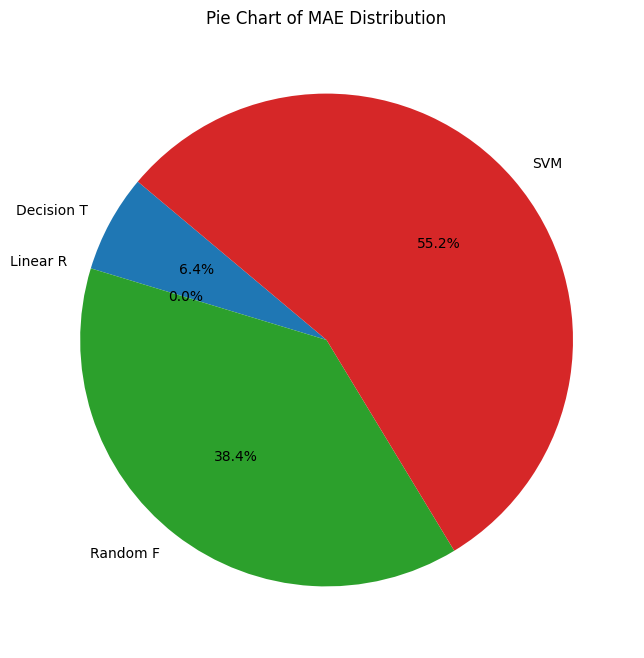

In [29]:
# Normalize MAE for better comparison (in case you want to visualize the proportionate difference)
results_df['MAE_normalized'] = (results_df['MAE'] - results_df['MAE'].min()) / (results_df['MAE'].max() - results_df['MAE'].min())

plt.figure(figsize=(8, 8))

# Pie chart for MAE
plt.pie(results_df['MAE_normalized'], labels=results_df['Model'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of MAE Distribution')
plt.show()


In [31]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Select relevant columns for time series forecasting
data = df[['Date', 'Daily_Return']].copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Feature Scaling
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Stock Price'].values.reshape(-1,1))


# Creating a dataset with 60-day time steps
look_back = 60
X, y = [], []

for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# Reshape data to match LSTM input
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Building the LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, batch_size=32, epochs=50)

# Preparing test data
test_data = df[len(df) - len(y) - look_back:].copy()
test_data_scaled = scaler.transform(test_data['Stock Price'].values.reshape(-1, 1))

X_test = []
y_test = df['Stock Price'].values[look_back + len(y):]

for i in range(look_back, len(test_data_scaled)):
    X_test.append(test_data_scaled[i-look_back:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predicting Stock Prices
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Plotting the predictions
plt.figure(figsize=(12, 6))
plt.plot(daf['Date'], df['Stock Price'], label='Actual Stock Price')
plt.plot(df['Date'][len(df) - len(y_test):], predictions, label='Predicted Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()

In [32]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 1469.6559736937177
R^2 Score: -0.016990525830179237


In [ ]:
# REPORT

In the tasks over Week 1 and Week 2, I applied the Decision Tree algorithm to predict stock market trends for Apple and Samsung. The process involved preparing a detailed dataset, cleaning it by removing duplicates, and training the Decision Tree model. I evaluated the model's performance using accuracy metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared score. During Week 2, I visualized the model's performance alongside other algorithms using various charts, including pie charts, line plots, and bar plots. Additionally, I learned about parameter tuning for the Decision Tree, such as adjusting the depth of the tree and the minimum samples per leaf, to optimize its performance and accuracy. These tasks provided valuable insights into how different features influence predictions and how to effectively evaluate and tune machine learning models.